In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/databases/pima-data.csv")

In [3]:
df.head().T
df.tail()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
763,10,101,76,48,180,32.9,0.171,63,1.8912,False
764,2,122,70,27,0,36.8,0.340,27,1.0638,False
765,5,121,72,23,112,26.2,0.245,30,0.9062,False
766,1,126,60,0,0,30.1,0.349,47,0.0000,True
767,1,93,70,31,0,30.4,0.315,23,1.2214,False


In [4]:
#vendo se há valores nulos
df.isnull().values.any()

False

In [5]:
def plot_corr(df,size=10):
  corr = df.corr()
  fig, ax = plt.subplots(figsize=(size,size))
  ax.matshow(corr)
  plt.xticks(range(len(corr.columns)), corr.columns)
  plt.yticks(range(len(corr.columns)), corr.columns)

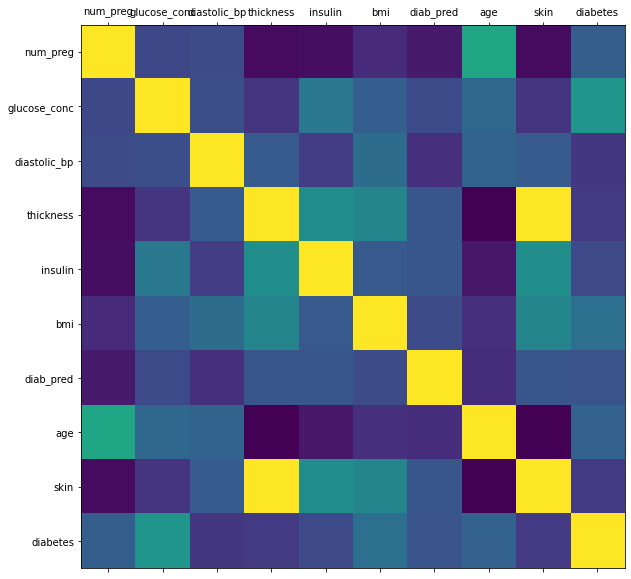

In [6]:
plot_corr(df)

In [7]:
df.corr().T

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081673,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057326,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436785,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392574,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183927,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113973,0.238356
skin,-0.081673,0.057326,0.207371,1.000000,0.436785,0.392574,0.183927,-0.113973,1.000000,0.074750
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074750,1.000000


In [8]:
# trocando valores para 0 e 1
diabetes_map = {True: 1, False: 0}

#implementando a alteração
df['diabetes'] = df['diabetes'].map(diabetes_map)

In [9]:
# um tem 268 e o outro 500
#len(df.loc[df['diabetes']==0])
#len(df.loc[df['diabetes']==1])

In [10]:
#colunas que vão fazer a previsão
atributos = ['num_preg', 'glucose_conc', 'diastolic_bp','glucose_conc', 'bmi', 'diab_pred']

In [11]:
# Variável que vai ser prevista
atrib_prev = ['diabetes']

In [12]:
# Criando os objetos

X = df[atributos].values
Y = df[atrib_prev].values


In [13]:
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = 0.3, random_state=42)

In [14]:
print("Original True : {0} ({1:0.2f}%)".format(len(df.loc[df['diabetes'] == 1]), 
                                               (len(df.loc[df['diabetes'] ==1])/len(df.index) * 100)))

print("Original False : {0} ({1:0.2f}%)".format(len(df.loc[df['diabetes'] == 0]), 
                                               (len(df.loc[df['diabetes'] == 0])/len(df.index) * 100)))
print("")
print("Training True : {0} ({1:0.2f}%)".format(len(Y_treino[Y_treino[:] == 1]), 
                                               (len(Y_treino[Y_treino[:] == 1])/len(Y_treino) * 100)))

print("Training False : {0} ({1:0.2f}%)".format(len(Y_treino[Y_treino[:] == 0]), 
                                               (len(Y_treino[Y_treino[:] == 0])/len(Y_treino) * 100)))
print("")
print("Test True : {0} ({1:0.2f}%)".format(len(Y_teste[Y_teste[:] == 1]), 
                                               (len(Y_teste[Y_teste[:] == 1])/len(Y_teste) * 100)))

print("Test False : {0} ({1:0.2f}%)".format(len(Y_teste[Y_teste[:] == 0]), 
                                               (len(Y_teste[Y_teste[:] == 0])/len(Y_teste) * 100)))

Original True : 268 (34.90%)
Original False : 500 (65.10%)

Training True : 188 (35.01%)
Training False : 349 (64.99%)

Test True : 80 (34.63%)
Test False : 151 (65.37%)


In [15]:
print("# Linhas no dataframe {0}".format(len(df)))
print("# Linhas missing glucose_conc: {0}".format(len(df.loc[df['glucose_conc'] == 0])))
print("# Linhas missing diastolic_bp: {0}".format(len(df.loc[df['diastolic_bp'] == 0])))
print("# Linhas missing thickness: {0}".format(len(df.loc[df['thickness'] == 0])))
print("# Linhas missing insulin: {0}".format(len(df.loc[df['insulin'] == 0])))
print("# Linhas missing bmi: {0}".format(len(df.loc[df['bmi'] == 0])))
print("# Linhas missing age: {0}".format(len(df.loc[df['age'] == 0])))

# Linhas no dataframe 768
# Linhas missing glucose_conc: 5
# Linhas missing diastolic_bp: 35
# Linhas missing thickness: 227
# Linhas missing insulin: 374
# Linhas missing bmi: 11
# Linhas missing age: 0


In [16]:
#Vendo se há valores nulos
df.isnull().values.any()

False

In [17]:
from sklearn.impute import SimpleImputer

tira_zero = SimpleImputer(missing_values=0, strategy = 'mean')

#fazendo substituição
X_treino = tira_zero.fit_transform(X_treino)
X_teste = tira_zero.fit_transform(X_teste)

### Construindo Algoritmo

In [18]:
from sklearn.naive_bayes import GaussianNB

In [19]:
modelo_vl = GaussianNB()

In [20]:
modelo_vl.fit(X_treino, Y_treino.ravel())

GaussianNB()

#### Verificando a exatidão

In [21]:
from sklearn import metrics

In [22]:
nb_predict_train = modelo_vl.predict(X_treino)
print("A Acurácia do modelo é: {0:.4f} ". format(metrics.accuracy_score(Y_treino, nb_predict_train)))

A Acurácia do modelo é: 0.7821 


In [23]:
nb_predict_test = modelo_vl.predict(X_teste)
print("A Acurácia do modelo é: {0:.4f} ". format(metrics.accuracy_score(Y_teste, nb_predict_test)))

A Acurácia do modelo é: 0.7489 


-------------------------------------------------------------------

# Versão com RandomForest

Usando o RandomForest para muscar uma melhor acurácia.

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
modelo_v2 = RandomForestClassifier(random_state=42)
modelo_v2.fit(X_treino, Y_treino.ravel())

RandomForestClassifier(random_state=42)

In [33]:
rf_predict_train = modelo_v2.predict(X_treino)
print("Acurácia: {0:.4f} ".format(metrics.accuracy_score(Y_treino,rf_predict_train)))

Acurácia: 1.0000 


In [36]:
rf_predict_test = modelo_v2.predict(X_teste)
print("Acurácia: {0:.4f} ".format(metrics.accuracy_score(Y_teste,rf_predict_test)))

Acurácia: 0.7229 


In [38]:
print("CONFUSION MATRIX")

print("{0}".format(metrics.confusion_matrix(Y_teste, rf_predict_test, labels = [1,0])))

print("{0}".format(metrics.classification_report(Y_teste, rf_predict_test, labels = [1,0])))

CONFUSION MATRIX
[[ 48  32]
 [ 32 119]]
              precision    recall  f1-score   support

           1       0.60      0.60      0.60        80
           0       0.79      0.79      0.79       151

    accuracy                           0.72       231
   macro avg       0.69      0.69      0.69       231
weighted avg       0.72      0.72      0.72       231



# 

----------------------------------------------------------------------------------

# REGRESSÃO LOGÍSTICA

In [40]:
from sklearn.linear_model import LogisticRegression

In [42]:
# Criando o terceiro modelo, desta vez com a regerssão logística

modelo_v3 = LogisticRegression(C = 0.7, random_state=42, max_iter=1000)
modelo_v3.fit(X_treino, Y_treino.ravel())
lr_predict_test = modelo_v3.predict(X_teste)

In [47]:
print("Exatidão (Accuracy): {0:.2f}".format(metrics.accuracy_score(Y_teste, lr_predict_test)))
print()
print(metrics.classification_report(Y_teste, lr_predict_test, labels = [1, 0]))

Exatidão (Accuracy): 0.76

              precision    recall  f1-score   support

           1       0.67      0.60      0.63        80
           0       0.80      0.84      0.82       151

    accuracy                           0.76       231
   macro avg       0.73      0.72      0.73       231
weighted avg       0.75      0.76      0.75       231



### Usando o Picke para salvar o modelo

In [50]:
import pickle

In [57]:
# salvando o modelo para usar mais tarde
filename = 'modelo_treinado_v1.sav'
pickle.dump(modelo_v3, open(filename, 'wb'))

In [67]:
#Fazendo as previsões
modelo = pickle.load(open(filename,'rb'))

r1 = modelo.predict(X_teste[0].reshape(1,-1))
r2 = modelo.predict(X_teste[2].reshape(1,-1))
r3 = modelo.predict(X_teste[1].reshape(1,-1))
r4 = modelo.predict(X_teste[13].reshape(1,-1))
r5 = modelo.predict(X_teste[51].reshape(1,-1))

In [68]:
print("A previsão 1 é: {0} ".format(r1))
print("A previsão 2 é: {0} ".format(r2))
print("A previsão 3 é: {0} ".format(r3))
print("A previsão 4 é: {0} ".format(r4))
print("A previsão 5 é: {0} ".format(r5))

A previsão 1 é: [0] 
A previsão 2 é: [0] 
A previsão 3 é: [0] 
A previsão 4 é: [0] 
A previsão 5 é: [1] 
